In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import glob, cv2


Using TensorFlow backend.


In [8]:
### this is the size of our encoded representations
encoding_dim = 2048 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
 
# this is our input placeholder
input_img = Input(shape=(1250,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(1250, activation='sigmoid')(encoded)
#decoded = Dense(1250, activation='relu')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
# configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')




In [9]:
# function to add some noise to images

def add_noise(x, noise_factor=0.1):
    x = x + np.random.randn(*x.shape) * noise_factor
    x = x.clip(0., 1.)
    return x


In [10]:
#https://www.youtube.com/watch?v=Zi-0rlM4RDs

#https://medium.com/@muskulpesent/create-numpy-array-of-images-fecb4e514c4b

# https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

#********************************************************************************************************
#Train data
train = []
files = glob.glob("PICTURES/normalised/train/" + "*.j*")
for myFile in files:
    image = cv2.imread (myFile, 0)
    train.append (image)
    print("myFile", image.shape)
    #plt.imshow(image)
    #plt.show()
train = np.array(train,dtype='float32') #as mnist
train = train.astype('float32') / 255.
print(train.shape)
# convert (number of images x height x width x number of channels) to (number of images x (height * width *3)) 
# for example (120 * 40 * 40 * 3)-> (120 * 4800)
train = np.reshape(train,[train.shape[0],train.shape[1]*train.shape[2]])
print(train.shape)

#********************************************************************************************************
#Test data
test = []
files = glob.glob("PICTURES/normalised/test/" + "*.j*")
for myFile in files:
    image = cv2.imread (myFile, 0)
    test.append (image)

test = np.array(test,dtype='float32') #as mnist example
test = test.astype('float32') / 255.
test = np.reshape(test,[test.shape[0],test.shape[1]*test.shape[2]])

#********************************************************************************************************

#train = np.array(train,dtype='float32')
#train = train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.


#train = train.reshape((len(train), np.prod(train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

train = add_noise(train)
test  = add_noise(test)

print(train.shape)
#bah  =  x_train
#bah.reshape(28, 28)
#plt.imshow(train)
#plt.gray()
#plt.show()
#plt.imshow(test[5])
#plt.gray()
#plt.show()



myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
myFile (25, 50)
(16, 25, 50)
(16, 1250)
(16, 1250)


In [14]:
# train the autoencoder

autoencoder.fit(train, train,  # input and output are the same
epochs=5000,
batch_size=256,
shuffle=True,
validation_data=(test, test))


Train on 16 samples, validate on 16 samples
Epoch 1/5000
16/16 [==============================] - 0s 10ms/step - loss: 0.5846 - val_loss: 0.6450
Epoch 2/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5845 - val_loss: 0.6450
Epoch 3/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.5845 - val_loss: 0.6450
Epoch 4/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.5844 - val_loss: 0.6450
Epoch 5/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5844 - val_loss: 0.6450
Epoch 6/5000
16/16 [==============================] - 0s 10ms/step - loss: 0.5843 - val_loss: 0.6450
Epoch 7/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5843 - val_loss: 0.6450
Epoch 8/5000
16/16 [==============================] - 0s 5ms/step - loss: 0.5842 - val_loss: 0.6450
Epoch 9/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5841 - val_loss: 0.6450
Epoch 10/5000
16/16 [==============================] -

In [15]:
# encode and decode some digits from the test set

encoded_imgs = encoder.predict(test)
decoded_imgs = decoder.predict(encoded_imgs)

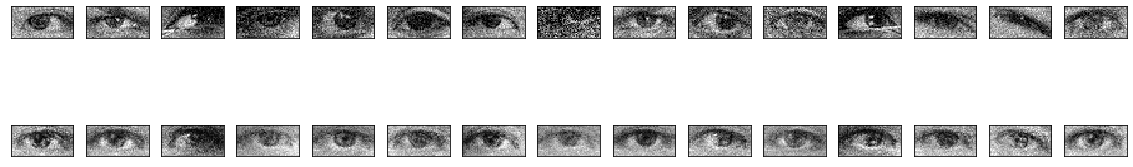

In [16]:
n = 15 # how many digits we will display
plt.figure(figsize=(20, 4))


# draw the original images

for i in range(n):
# display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test[i].reshape(25, 50))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
   
    
# draw the reconstructed outputs

for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(25, 50))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# draw the encoded images (latent space)
# these are very small (4x8 pixels)


for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    b = plt.imshow(encoded_imgs[i,:].reshape(32,64)) # reshaping the 32 latent values.
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
 


In [122]:
encoder.summary()



Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 1250)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                40032     
Total params: 40,032
Trainable params: 40,032
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# simple ways to access weights and data in/out

#layer.input
#layer.output
#layer.input_shape
#layer.output_shape

#layer.get_input_at(node_index)
#layer.get_output_at(node_index)
#layer.get_input_shape_at(node_index)
#layer.get_output_shape_at(node_index)


In [123]:
decoded_imgs = decoder.predict(encoded_imgs)

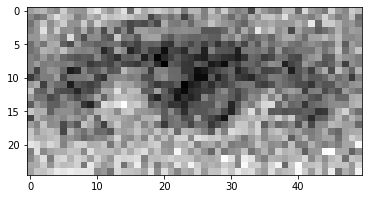

In [128]:
plt.imshow(decoded_imgs[0].reshape(25, 50))

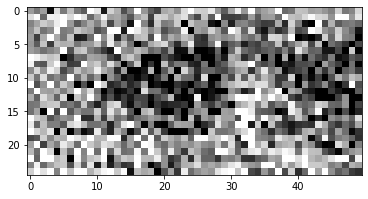

In [129]:
plt.imshow(test[0].reshape(25, 50))

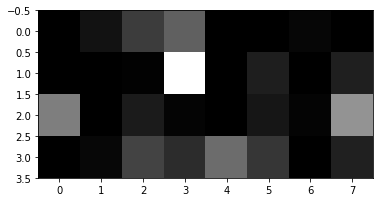

In [127]:
plt.imshow(encoded_imgs[0,:].reshape(4,8))